# Explore here

#### IMPORTACIONES

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import  mean_squared_error, r2_score, mean_absolute_error
import pickle



-------

#### Lectura del data set

In [208]:
df = pd.read_csv(r"C:\Users\emili\OneDrive\Documentos\GitHub\Regression-Emiliano\data\demographic_health_data.csv")
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


------

#### Exploracion de los datos

In [209]:
df.shape

(3140, 108)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [211]:
columns = df.columns
columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)

- Vemos que todas las columnas son tipo objet

In [212]:
df.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [213]:
df.isnull().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

- Vemos que no hay valores nulos

In [214]:
df.duplicated().sum()

np.int64(0)

- Tampoco hay duplicados

-----

#### Analisis de correlacion

In [215]:
df_numeric = df.drop(["COUNTY_NAME", "STATE_NAME"], axis=1)

In [216]:
correlation_matrix = df_numeric.corr()
correlation_matrix

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
fips,1.000000,-0.056079,-0.049580,-0.010586,-0.053130,0.018994,-0.053591,-0.030310,-0.051715,-0.045491,...,-0.063463,-0.031057,-0.036327,-0.026483,-0.056055,-0.040631,-0.044576,-0.033649,-0.062322,-0.008345
TOT_POP,-0.056079,1.000000,0.994010,0.052507,0.994596,0.023384,0.994558,0.160254,0.995526,0.295635,...,0.981495,-0.174843,-0.160621,-0.187362,0.989583,-0.218731,-0.202895,-0.230914,0.993889,-0.428608
0-9,-0.049580,0.994010,1.000000,0.085920,0.997487,0.048341,0.989992,0.161984,0.990971,0.304263,...,0.972641,-0.167495,-0.152687,-0.180585,0.984664,-0.216430,-0.200512,-0.229570,0.985337,-0.423641
0-9 y/o % of total pop,-0.010586,0.052507,0.085920,1.000000,0.074714,0.687844,0.056047,0.130136,0.058535,0.342930,...,0.034582,-0.028295,-0.005923,-0.048949,0.047539,-0.133841,-0.117138,-0.153847,0.040384,-0.050916
19-Oct,-0.053130,0.994596,0.997487,0.074714,1.000000,0.056762,0.988552,0.167605,0.987298,0.294682,...,0.973427,-0.178421,-0.163623,-0.191449,0.982778,-0.226956,-0.210885,-0.239865,0.985221,-0.431290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CKD_prevalence,-0.040631,-0.218731,-0.216430,-0.133841,-0.226956,-0.276999,-0.219593,-0.366835,-0.215739,-0.478115,...,-0.191943,0.918514,0.908023,0.925347,-0.175064,1.000000,0.995203,0.995594,-0.183045,0.471775
CKD_Lower 95% CI,-0.044576,-0.202895,-0.200512,-0.117138,-0.210885,-0.259547,-0.203506,-0.341480,-0.199999,-0.450913,...,-0.176039,0.924630,0.917499,0.928512,-0.159501,0.995203,1.000000,0.989756,-0.167424,0.454327
CKD_Upper 95% CI,-0.033649,-0.230914,-0.229570,-0.153847,-0.239865,-0.296576,-0.232199,-0.393541,-0.228048,-0.506720,...,-0.204368,0.906711,0.892914,0.916610,-0.187528,0.995594,0.989756,1.000000,-0.195052,0.489551
CKD_number,-0.062322,0.993889,0.985337,0.040384,0.985221,0.007654,0.986895,0.149367,0.985851,0.271343,...,0.991025,-0.144575,-0.131191,-0.156493,0.995536,-0.183045,-0.167424,-0.195052,1.000000,-0.416486


In [217]:
correlations_list = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        
        
        if not np.isnan(corr_value):
            correlations_list.append({
                'Variable_1': var1,
                'Variable_2': var2,
                'Correlacion': corr_value,
                'Correlacion_Abs': abs(corr_value)
            })

correlations_df = pd.DataFrame(correlations_list)
correlations_df = correlations_df.sort_values('Correlacion_Abs', ascending=False)

In [218]:
correlations_df

,Variable_1,Variable_2,Correlacion,Correlacion_Abs
4193,MEDHHINC_2018,Median_Household_Income_2018,1.000000,1.000000
135,TOT_POP,POP_ESTIMATE_2018,1.000000,1.000000
77,fips,STATE_FIPS,0.999975,0.999975
4340,Civilian_labor_force_2018,Employed_2018,0.999965,0.999965
178,TOT_POP,Total Population,0.999650,0.999650
...,...,...,...,...
2184,% Black-alone,Percent of adults with a high school diploma o...,-0.000286,0.000286
4827,Active Patient Care General Surgeons per 10000...,Internal Medicine Primary Care (2019),-0.000278,0.000278
1183,40-49 y/o % of total pop,COPD_Upper 95% CI,0.000235,0.000235
583,10-19 y/o % of total pop,ICU Beds_x,-0.000163,0.000163


In [219]:
umbral_correlacion = 0.5
correlaciones_altas = correlations_df[correlations_df["Correlacion_Abs"] > umbral_correlacion]
correlaciones_altas

,Variable_1,Variable_2,Correlacion,Correlacion_Abs
4193,MEDHHINC_2018,Median_Household_Income_2018,1.000000,1.000000
135,TOT_POP,POP_ESTIMATE_2018,1.000000,1.000000
77,fips,STATE_FIPS,0.999975,0.999975
4340,Civilian_labor_force_2018,Employed_2018,0.999965,0.999965
178,TOT_POP,Total Population,0.999650,0.999650
...,...,...,...,...
3159,R_death_2018,Percent of adults with a high school diploma o...,0.504211,0.504211
2236,% Black-alone,diabetes_Lower 95% CI,0.503474,0.503474
1895,80+ y/o % of total pop,Heart disease_Upper 95% CI,0.503452,0.503452
4618,Med_HH_Income_Percent_of_State_Total_2018,Urban_rural_code,-0.503401,0.503401


In [220]:
variables_importantes = set()
top_correlaciones = correlations_df.head(30)  # Top 30 pares

for _, row in top_correlaciones.iterrows():
    variables_importantes.add(row['Variable_1'])
    variables_importantes.add(row['Variable_2'])

variables_importantes = list(variables_importantes)
print(f"\nVariables más correlacionadas (reducidas): {len(variables_importantes)}")
print(variables_importantes[:20])


Variables más correlacionadas (reducidas): 29
['POP_ESTIMATE_2018', 'Heart disease_prevalence', 'Total Population', 'TOT_POP', 'Population Aged 60+', 'diabetes_Upper 95% CI', 'diabetes_prevalence', 'Obesity_Upper 95% CI', 'STATE_FIPS', 'anycondition_Lower 95% CI', '40-49', 'diabetes_Lower 95% CI', '50-59', 'MEDHHINC_2018', 'Civilian_labor_force_2018', 'county_pop2018_18 and older', '60-69', 'anycondition_prevalence', 'Obesity_Lower 95% CI', 'Median_Household_Income_2018']



Top 20 variables que más aparecen en correlaciones altas:
POP_ESTIMATE_2018: 7 apariciones
Total Population: 7 apariciones
county_pop2018_18 and older: 7 apariciones
TOT_POP: 6 apariciones
Civilian_labor_force_2018: 6 apariciones
Employed_2018: 6 apariciones
40-49: 6 apariciones
50-59: 3 apariciones
anycondition_prevalence: 2 apariciones
diabetes_prevalence: 2 apariciones
Obesity_prevalence: 2 apariciones
Heart disease_prevalence: 2 apariciones
Population Aged 60+: 2 apariciones
MEDHHINC_2018: 1 apariciones
Median_Household_Income_2018: 1 apariciones
fips: 1 apariciones
STATE_FIPS: 1 apariciones
anycondition_Upper 95% CI: 1 apariciones
anycondition_Lower 95% CI: 1 apariciones
anycondition_number: 1 apariciones


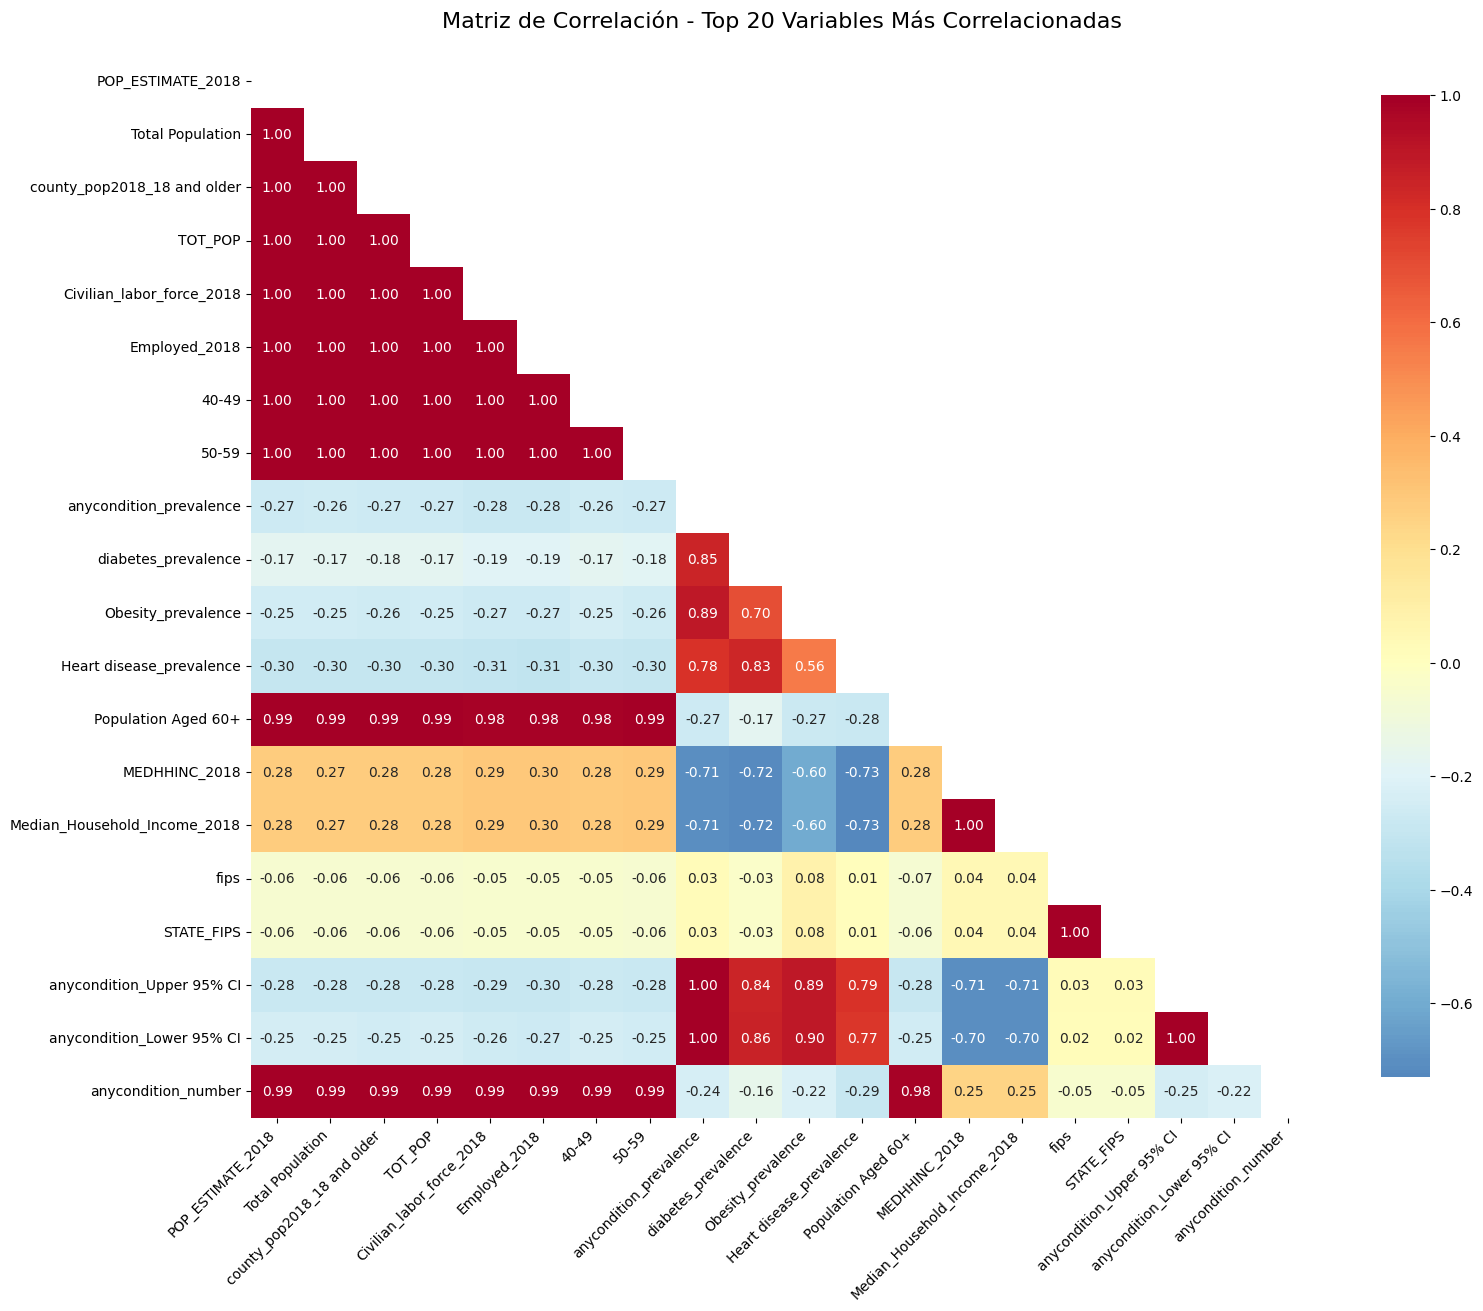

In [221]:
if len(variables_importantes) <= 25:  # Si son pocas, mostrar todas
    corr_reducida = df[variables_importantes].corr()
    
    plt.figure(figsize=(15, 12))
    mask = np.triu(np.ones_like(corr_reducida, dtype=bool))
    
    sns.heatmap(corr_reducida, 
                mask=mask,
                annot=True, 
                fmt='.2f',
                cmap='RdYlBu_r', 
                center=0,
                square=True,
                cbar_kws={"shrink": .8})
    
    plt.title('Matriz de Correlación - Variables Más Importantes', fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

else:
    # Si son muchas, tomar solo las top 20 variables que más aparecen
    contador_variables = {}
    for _, row in correlations_df.head(40).iterrows():
        var1, var2 = row['Variable_1'], row['Variable_2']
        contador_variables[var1] = contador_variables.get(var1, 0) + 1
        contador_variables[var2] = contador_variables.get(var2, 0) + 1
    
    # Top 20 variables que más aparecen en correlaciones altas
    top_20_vars = sorted(contador_variables.items(), key=lambda x: x[1], reverse=True)[:20]
    variables_top20 = [var[0] for var in top_20_vars]

    print(f"\nTop 20 variables que más aparecen en correlaciones altas:")
    for var, count in top_20_vars:
        print(f"{var}: {count} apariciones")
    
    # Heatmap con top 20
    corr_top20 = df[variables_top20].corr()
    
    plt.figure(figsize=(16, 14))
    mask = np.triu(np.ones_like(corr_top20, dtype=bool))
    
    sns.heatmap(corr_top20, 
                mask=mask,
                annot=True, 
                fmt='.2f',
                cmap='RdYlBu_r', 
                center=0,
                square=True,
                cbar_kws={"shrink": .8})
    
    plt.title('Matriz de Correlación - Top 20 Variables Más Correlacionadas', fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


#### Eleccion del tarjet

- Viendo un poco el grafico, decidi poner mi objetivo o tarjet en Obesity_prevalence, ya que es un notable problema de la actualiad en los Estados Unidos.

In [222]:
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

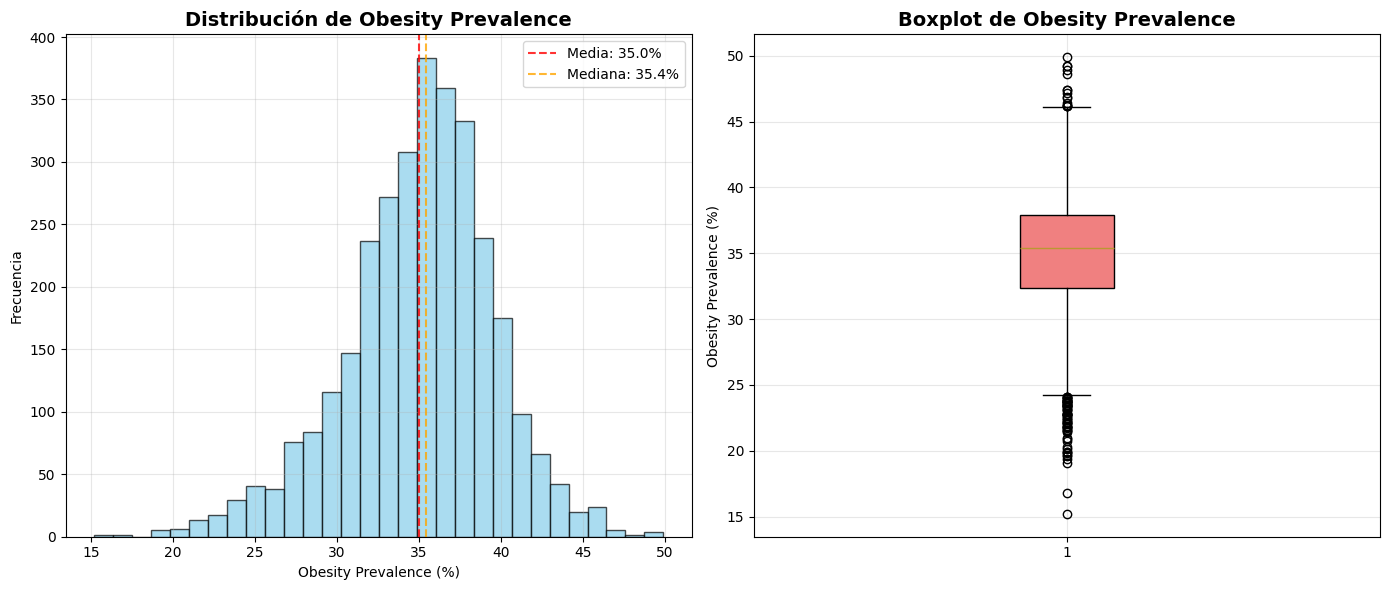

In [223]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Obesity_prevalence'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribución de Obesity Prevalence', fontsize=14, fontweight='bold')
plt.xlabel('Obesity Prevalence (%)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)


mean_val = df['Obesity_prevalence'].mean()
median_val = df['Obesity_prevalence'].median()
plt.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Media: {mean_val:.1f}%')
plt.axvline(median_val, color='orange', linestyle='--', alpha=0.8, label=f'Mediana: {median_val:.1f}%')
plt.legend()

# Boxplot de Obesity_prevalence
plt.subplot(1, 2, 2)
box_plot = plt.boxplot(df['Obesity_prevalence'].dropna(), patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightcoral')
plt.title('Boxplot de Obesity Prevalence', fontsize=14, fontweight='bold')
plt.ylabel('Obesity Prevalence (%)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [224]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
correlations_with_target = df[numeric_cols].corr()['Obesity_prevalence'].drop('Obesity_prevalence')

correlations_with_target = correlations_with_target.sort_values(key=abs, ascending=False)


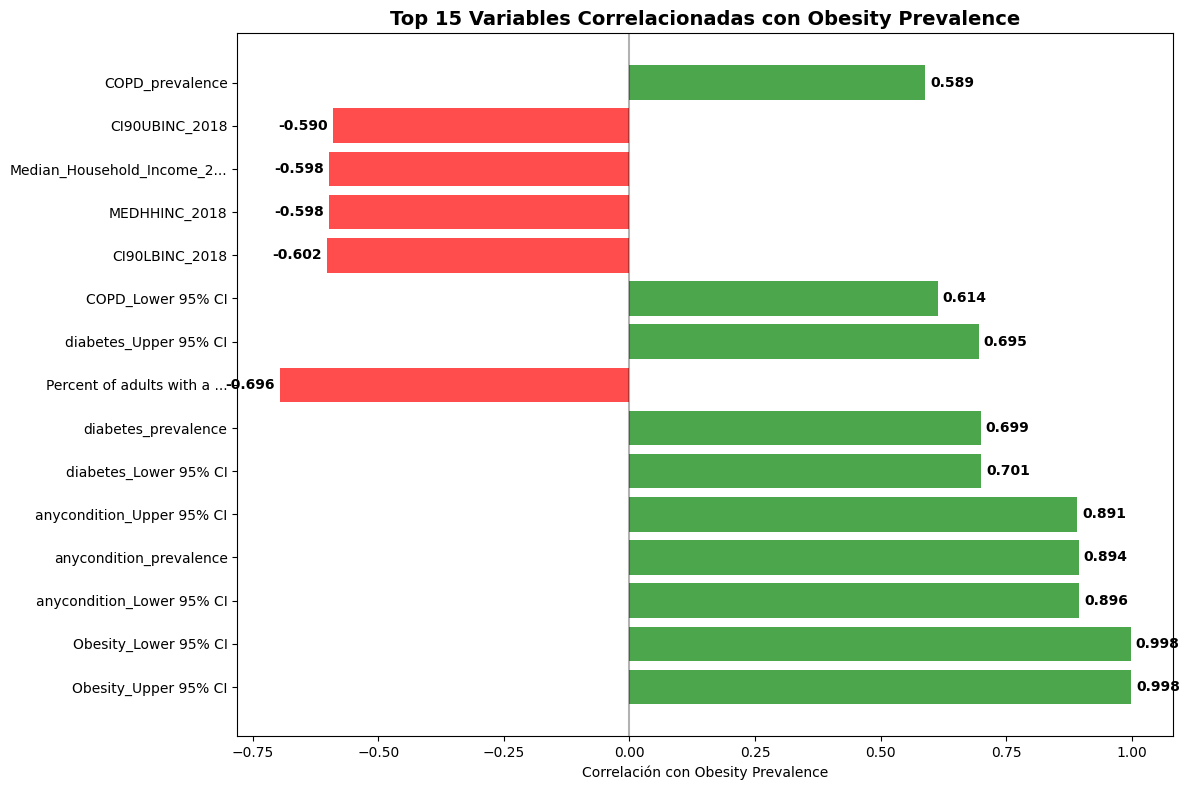

In [225]:
plt.figure(figsize=(12, 8))
top_15 = correlations_with_target.head(15)
colors = ['red' if x < 0 else 'green' for x in top_15.values]

bars = plt.barh(range(len(top_15)), top_15.values, color=colors, alpha=0.7)
plt.yticks(range(len(top_15)), [var[:25] + '...' if len(var) > 25 else var for var in top_15.index])
plt.xlabel('Correlación con Obesity Prevalence')
plt.title('Top 15 Variables Correlacionadas con Obesity Prevalence', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Agregar valores en las barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.01 if width >= 0 else width - 0.01, 
             bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', 
             ha='left' if width >= 0 else 'right', 
             va='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [226]:
df["STATE_NAME"].value_counts()

STATE_NAME
Texas                   254
Georgia                 159
Virginia                133
Kentucky                120
Missouri                115
Kansas                  105
Illinois                102
North Carolina          100
Iowa                     99
Tennessee                95
Nebraska                 93
Indiana                  92
Ohio                     88
Minnesota                87
Michigan                 83
Mississippi              82
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Pennsylvania             67
Alabama                  67
Florida                  67
South Dakota             66
Louisiana                64
Colorado                 64
New York                 62
California               58
Montana                  56
West Virginia            55
North Dakota             53
South Carolina           46
Idaho                    44
Washington               39
Oregon                   36
New Mexico               33
Utah     

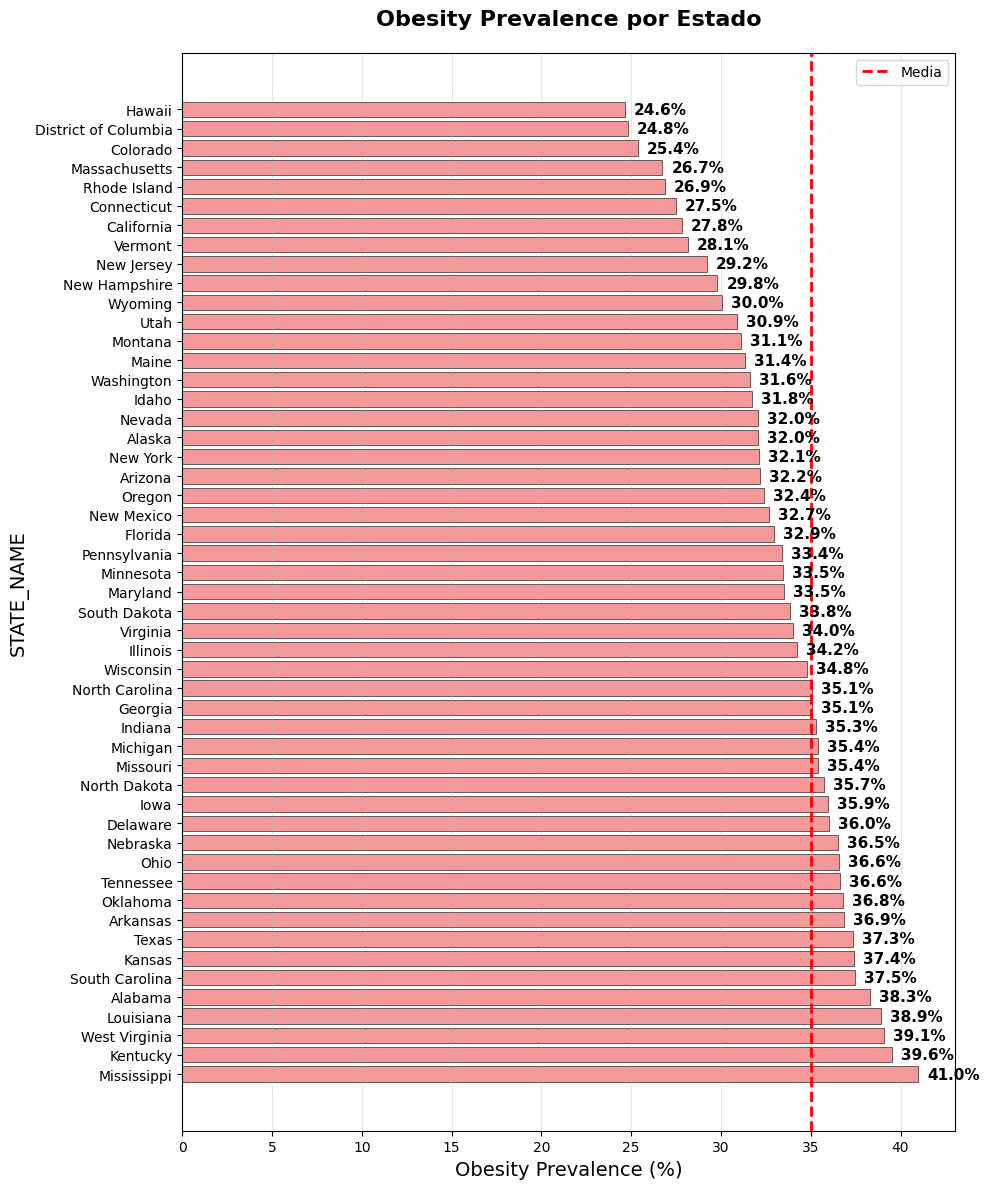

In [227]:

columna_categorica = 'STATE_NAME'  

medias_por_categoria = df.groupby(columna_categorica)['Obesity_prevalence'].mean().sort_values(ascending=False)

conteos_por_categoria = df.groupby(columna_categorica)['Obesity_prevalence'].count()

media_general = df["Obesity_prevalence"].mean() 

#Grafico barras horizontal
plt.figure(figsize=(10, 12))

barras_h = plt.barh(range(len(medias_por_categoria)), 
                    medias_por_categoria.values, 
                    color='lightcoral', 
                    alpha=0.8,
                    edgecolor='black',
                    linewidth=0.5)

plt.title(f'Obesity Prevalence por Estado', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel(columna_categorica, fontsize=14)
plt.xlabel('Obesity Prevalence (%)', fontsize=14)

plt.yticks(range(len(medias_por_categoria)), medias_por_categoria.index)

# Valores en barras horizontales
for i, barra in enumerate(barras_h):
    ancho = barra.get_width()
    plt.text(ancho + 0.5, 
             barra.get_y() + barra.get_height()/2.,
             f'{ancho:.1f}%', 
             ha='left', 
             va='center', 
             fontweight='bold',
             fontsize=11)

plt.axvline(x=media_general, color='red', linestyle='--', linewidth=2, label="Media")

plt.legend()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


- Con este grafico podemos analizar que estados tienen mayores problemas de Obesidad.
- Vemos que Mississippi es el mas complicado, teniendo 41 pacientes con Obesidad por cada 100 habitantes. 
- Tambien observamos que Hawaii o Columbia son los menos afectados, pero con numeros no tan bajos.

-----

> Voy a proceder a eliminar las columnas que me son irrelevantes para poder comenzar el modelado.

In [228]:
columnas_cat = df.select_dtypes(include=['object', 'category']).columns.tolist()
columnas_finales = variables_importantes + columnas_cat


In [229]:
df = df[columnas_finales]
df

,POP_ESTIMATE_2018,Heart disease_prevalence,Total Population,TOT_POP,Population Aged 60+,diabetes_Upper 95% CI,diabetes_prevalence,Obesity_Upper 95% CI,STATE_FIPS,anycondition_Lower 95% CI,...,anycondition_Upper 95% CI,19-Oct,anycondition_number,Obesity_prevalence,Employed_2018,Obesity_number,Heart disease_Upper 95% CI,fips,COUNTY_NAME,STATE_NAME
0,55601,7.9,55036,55601,10523,13.8,12.9,37.3,1,45.4,...,49.4,7637,20181,35.8,25015,15193,8.7,1001,Autauga,Alabama
1,218022,7.8,203360,218022,53519,13.1,12.0,31.0,1,38.2,...,42.3,26913,68790,29.7,90456,50761,8.7,1003,Baldwin,Alabama
2,24881,11.0,26201,24881,6150,20.6,19.7,41.9,1,55.6,...,59.1,2960,11325,40.7,7940,8013,11.8,1005,Barbour,Alabama
3,22400,8.6,22580,22400,4773,14.9,14.1,40.2,1,49.6,...,53.4,2596,9190,38.7,8317,6894,9.3,1007,Bibb,Alabama
4,57840,9.2,57667,57840,13600,14.5,13.5,35.5,1,44.3,...,48.4,7570,20584,34.0,24128,15112,10.1,1009,Blount,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,43051,5.9,44527,43051,7015,9.6,8.9,35.1,56,38.5,...,42.2,6326,12796,33.6,20254,10672,6.4,56037,Sweetwater,Wyoming
3136,23081,5.2,22923,23081,4298,8.0,7.2,20.8,56,22.4,...,26.1,2185,4576,19.4,14876,3655,5.8,56039,Teton,Wyoming
3137,20299,7.2,20758,20299,3554,11.2,10.4,35.7,56,40.0,...,44.2,3205,6101,34.2,8541,4944,7.9,56041,Uinta,Wyoming
3138,7885,8.2,8253,7885,2206,12.1,11.3,29.8,56,35.3,...,39.5,1113,2285,28.4,3886,1730,9.0,56043,Washakie,Wyoming


- Tome la decision de eliminar la columna "COUNTY_NAME" ya que tiene demasiada granularidad y puede causar overfitting. "STATE_NAME" ya es suficiente para capturar patrones geograficos

In [230]:
df = df.drop("COUNTY_NAME", axis=1)


> Codificacion

- Ahora codificaremos nuestra columna categorica "STATE_NAME" con get_dummies

In [231]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [232]:
df_encoded

,POP_ESTIMATE_2018,Heart disease_prevalence,Total Population,TOT_POP,Population Aged 60+,diabetes_Upper 95% CI,diabetes_prevalence,Obesity_Upper 95% CI,STATE_FIPS,anycondition_Lower 95% CI,...,STATE_NAME_South Dakota,STATE_NAME_Tennessee,STATE_NAME_Texas,STATE_NAME_Utah,STATE_NAME_Vermont,STATE_NAME_Virginia,STATE_NAME_Washington,STATE_NAME_West Virginia,STATE_NAME_Wisconsin,STATE_NAME_Wyoming
0,55601,7.9,55036,55601,10523,13.8,12.9,37.3,1,45.4,...,False,False,False,False,False,False,False,False,False,False
1,218022,7.8,203360,218022,53519,13.1,12.0,31.0,1,38.2,...,False,False,False,False,False,False,False,False,False,False
2,24881,11.0,26201,24881,6150,20.6,19.7,41.9,1,55.6,...,False,False,False,False,False,False,False,False,False,False
3,22400,8.6,22580,22400,4773,14.9,14.1,40.2,1,49.6,...,False,False,False,False,False,False,False,False,False,False
4,57840,9.2,57667,57840,13600,14.5,13.5,35.5,1,44.3,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,43051,5.9,44527,43051,7015,9.6,8.9,35.1,56,38.5,...,False,False,False,False,False,False,False,False,False,True
3136,23081,5.2,22923,23081,4298,8.0,7.2,20.8,56,22.4,...,False,False,False,False,False,False,False,False,False,True
3137,20299,7.2,20758,20299,3554,11.2,10.4,35.7,56,40.0,...,False,False,False,False,False,False,False,False,False,True
3138,7885,8.2,8253,7885,2206,12.1,11.3,29.8,56,35.3,...,False,False,False,False,False,False,False,False,False,True


- Ahora podemos empezar el split para luego normalizar

-------

#### Split y normalizacion

In [233]:
X = df_encoded.drop("Obesity_prevalence", axis=1)
y = df_encoded["Obesity_prevalence"]


- Normalizacion con StandardScaler.

In [235]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

> Split con train_test_split


In [238]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=22)

#### Modelado

- Creamos el modelo

In [240]:
model = Lasso(alpha=0.01)
model.fit(X_train, y_train)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


- Predecimos

In [242]:
y_pred = model.predict(X_test)

- Vemos las metricas

In [247]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {np.sqrt(mse):.3f}")

R² Score: 1.000
MSE: 0.003
MAE: 0.047
RMSE: 0.058


- Con estas metricas nos damos cuenta de que hay un importante overfitting, por lo que procedere a buscar posibles variables leakage y eliminarlas. 

In [250]:
variables_leakage = [
    'Obesity_Upper 95% CI',      # Directamente relacionado con obesity
    'Obesity_Lower 95% CI',      # Directamente relacionado con obesity  
    'Obesity_number',            # Directamente relacionado con obesity
    'diabetes_prevalence',       # Diabetes y obesity están súper correlacionados
    'diabetes_Upper 95% CI',     # Relacionado con diabetes
    'diabetes_Lower 95% CI',     # Relacionado con diabetes
    'Heart disease_prevalence',  # Enfermedad cardíaca correlaciona con obesity
    'Heart disease_Upper 95% CI', # Relacionado con heart disease
    'anycondition_prevalence',   # "Any condition" incluye obesity
    'anycondition_Lower 95% CI', # Relacionado con conditions
    'anycondition_Upper 95% CI', # Relacionado con conditions
    'anycondition_number',       # Relacionado con conditions
    'fips',                      # ID único, no predictivo
    'STATE_FIPS'                 # ID único, redundante con State_name
]

In [252]:
X_clean = X_scaled.drop(variables_leakage, axis=1)

# Haremos de nuevo el split
X_train_clean, X_test_clean, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42
)

# Entrenamos de nuevo
model_clean = Lasso(alpha=0.01)
model_clean.fit(X_train_clean, y_train)

# Nuevas predicciones
y_pred_clean = model_clean.predict(X_test_clean)

# Nuevas metricas
r2_clean = r2_score(y_test, y_pred_clean)
print(f"R² nuevo: {r2_clean:.3f}")  

R² nuevo: 0.646


c:\Users\emili\OneDrive\Documentos\GitHub\Regression-Emiliano\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.445e+01, tolerance: 5.108e+00
  model = cd_fast.enet_coordinate_descent(


- Mas realista, ahora vamos a optimizarlo con LassoCV

In [255]:
lasso_cv = LassoCV(cv=5, random_state=22)
lasso_cv.fit(X_train_clean, y_train)

c:\Users\emili\OneDrive\Documentos\GitHub\Regression-Emiliano\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.732e+00, tolerance: 3.940e+00
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\emili\OneDrive\Documentos\GitHub\Regression-Emiliano\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.625e+00, tolerance: 3.940e+00
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\emili\OneDrive\Documentos\GitHub\Regression-Emiliano\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to in

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [256]:
model_opt = Lasso(alpha=lasso_cv.alpha_)
model_opt.fit(X_train_clean, y_train)

y_pred_opt = model_opt.predict(X_test_clean)

r2_opt = r2_score(y_test, y_pred_opt)
print(f"R2 optimizado: {r2_opt:.3f}")

R2 optimizado: 0.655


c:\Users\emili\OneDrive\Documentos\GitHub\Regression-Emiliano\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.879e+03, tolerance: 5.108e+00
  model = cd_fast.enet_coordinate_descent(


- Guardado del modelo y el scaler

In [258]:

# Guardar modelo
with open('lasso_model.pkl', 'wb') as f:
    pickle.dump(model_opt, f)

# Guardar scaler (MUY IMPORTANTE)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
